<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part6/P6_Ch02_CH02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Data
## UCF11 Dataset

In [ ]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
len(glob('Desktop/UCF11_updated_mpg/*/*/*.mpg'))
file_paths = glob('Desktop/UCF11_updated_mpg/*/*/*.mpg')

In [ ]:
print(file_paths[0])
cap = cv2.VideoCapture(file_paths[0])

frames = []

while True:
    ret, frame = cap.read() # 한프레임씩 return, frame
    if not ret :
        break

    frame = cv2.resize(frame, (256,256))
    frame = frame[:, :, [2,1,0]] #BGR -> RGB
    frames.append(frame)



cap.release()

Desktop/UCF11_updated_mpg/volleyball_spiking/v_spiking_12/v_spiking_12_04.mpg


In [ ]:
len(frames)

137

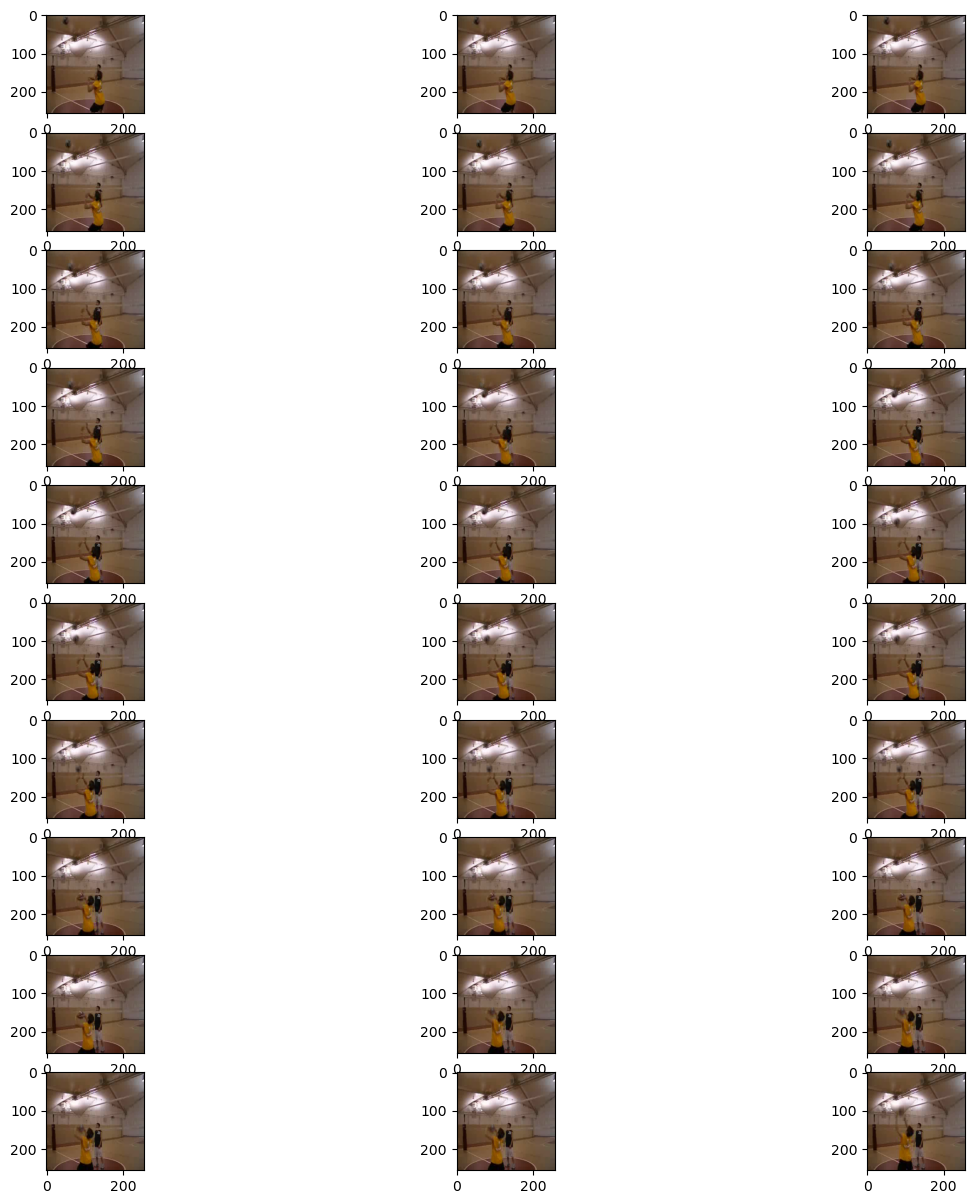

In [ ]:
arr = np.array(frames)
plt.figure(figsize = (15,15))

for i in range(10) :
    plt.subplot(10,3, 1 + 3*i)
    plt.imshow(arr[1 + 3*i])
    plt.subplot(10,3, 2 + 3*i)
    plt.imshow(arr[2 + 3*i])
    plt.subplot(10,3, 3 + 3*i)
    plt.imshow(arr[3 + 3*i])



In [ ]:
len(frames)/29.97 # 동영상 초 구하기

4.571237904571238

In [ ]:
for file_path in file_paths :
    cap = cv2.VideoCapture(file_path)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # frame count
    print(file_path)
    print(length, 'frames')
    print(length /29.97, 'sec')

    cap.release()

    break

Desktop/UCF11_updated_mpg/volleyball_spiking/v_spiking_12/v_spiking_12_04.mpg
137 frames
4.571237904571238 sec


## EDA

In [ ]:
df = pd.DataFrame(columns =[
    'file_path', 'frames', 'duration', 'label'
])

for file_path in file_paths :
    label = file_path.split('/')[2]

    cap = cv2.VideoCapture(file_path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frames /29.97
    elem ={
        'file_path' : file_path,
        'frames' : frames,
        'duration' : duration,
        'label' : label
    }
    df.loc[len(df)] = elem
    cap.release()

In [ ]:
df


,file_path,frames,duration,label
0,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,137,4.571238,volleyball_spiking
1,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,101,3.370037,volleyball_spiking
2,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,62,2.068735,volleyball_spiking
3,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,115,3.837171,volleyball_spiking
4,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,86,2.869536,volleyball_spiking
...,...,...,...,...
1595,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,155,5.171839,diving
1596,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,145,4.838172,diving
1597,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,168,5.605606,diving
1598,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,158,5.271939,diving


In [ ]:
df_duration_sum_by_label = df.groupby('label').duration.sum().rename('Sum').reset_index().set_index('label')
df_duration_avg_by_label = df.groupby('label').duration.mean().rename('Avg').reset_index().set_index('label')

<Axes: xlabel='label'>

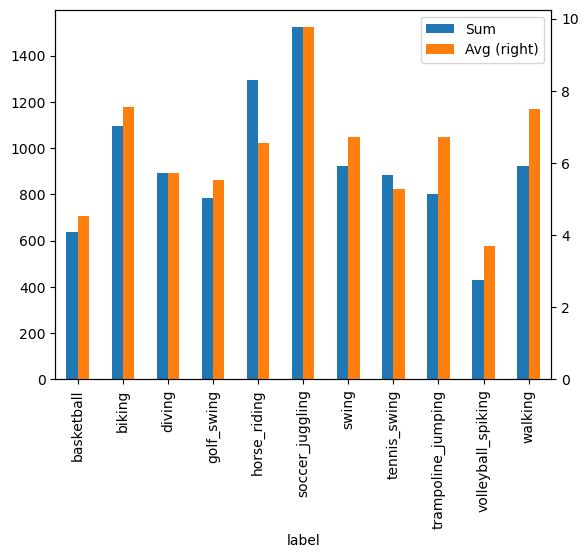

In [ ]:
df_video_stats = pd.concat([df_duration_sum_by_label,df_duration_avg_by_label], axis =1)
df_video_stats.plot.bar(secondary_y = 'Avg')

In [ ]:
df['> 10.0 Sec'] = df['duration'] >=10.0
df['5.0 - 10.0 Sec'] = (5.0 <= df['duration']) & (df['duration'] < 10.0)
df['2.0 - 5.0 Sec'] = (2.0 <= df['duration']) & ( df['duration'] < 5.0)
df['0.0 - 2.0 Sec'] = ( 0.0 <= df['duration']) & ( df['duration'] < 2.0)

df

,file_path,frames,duration,label,> 10.0 Sec,5.0 - 10.0 Sec,2.0 - 5.0 Sec,0.0 - 2.0 Sec
0,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,137,4.571238,volleyball_spiking,False,False,True,False
1,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,101,3.370037,volleyball_spiking,False,False,True,False
2,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,62,2.068735,volleyball_spiking,False,False,True,False
3,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,115,3.837171,volleyball_spiking,False,False,True,False
4,Desktop/UCF11_updated_mpg/volleyball_spiking/v...,86,2.869536,volleyball_spiking,False,False,True,False
...,...,...,...,...,...,...,...,...
1595,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,155,5.171839,diving,False,True,False,False
1596,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,145,4.838172,diving,False,False,True,False
1597,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,168,5.605606,diving,False,True,False,False
1598,Desktop/UCF11_updated_mpg/diving/v_diving_08/v...,158,5.271939,diving,False,True,False,False


In [ ]:
df_groupby_label = df.groupby('label')
df_groupby_stats = pd.concat( [
    df_groupby_label['0.0 - 2.0 Sec'].sum().reset_index().set_index('label'),
    df_groupby_label['2.0 - 5.0 Sec'].sum().reset_index().set_index('label'),
    df_groupby_label['5.0 - 10.0 Sec'].sum().reset_index().set_index('label'),
    df_groupby_label['> 10.0 Sec'].sum().reset_index().set_index('label')
], axis = 1)

df_groupby_stats

,0.0 - 2.0 Sec,2.0 - 5.0 Sec,5.0 - 10.0 Sec,> 10.0 Sec
label,,,,
basketball,5,102,28,6
biking,0,9,113,23
diving,2,57,91,6
golf_swing,0,79,56,7
horse_riding,2,14,180,2
soccer_juggling,0,9,88,59
swing,0,15,104,18
tennis_swing,0,90,70,7
trampoline_jumping,0,12,101,6


<Axes: xlabel='label', ylabel='Number of Videos'>

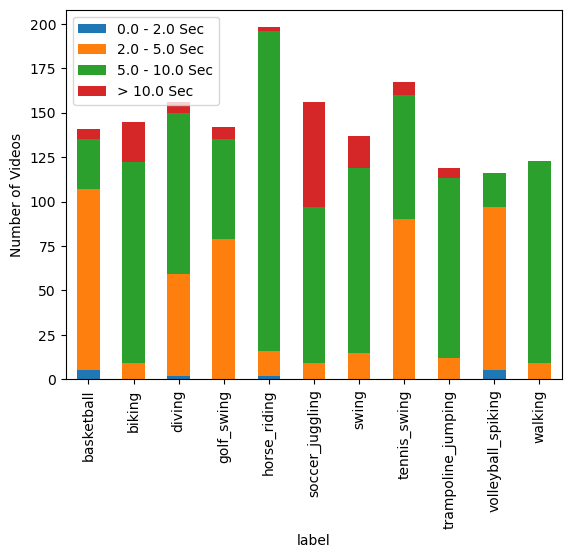

In [ ]:
df_groupby_stats.plot.bar(stacked = True, ylabel = 'Number of Videos')